In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [3]:
data=pd.read_csv('Social_Network_Ads.csv')
print(data.head())

Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0


In [5]:
data.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [7]:
data.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values.reshape(-1,1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [11]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [26]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf',probability=True)
svc.fit(x_train,y_train)

SVC(probability=True)

In [27]:
svc.score(x_train,y_train)

0.9133333333333333

In [28]:
y_pred=svc.predict(x_test)

In [29]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print(classification_report(y_test,y_pred))

precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



In [30]:
confusion_matrix(y_test,y_pred)

array([[64,  4],
       [ 3, 29]])

In [31]:
accuracy_score(y_test,y_pred)

0.93

In [39]:
probabilities=svc.predict_proba(x_test)[:,1]
max_ones=y_test.sum()
l=[y for _,y in sorted(zip(probabilities,y_test),reverse=True)]
y_scale=np.append([0],np.cumsum(l))
x_scale=np.arange(0,len(y_test)+1)
mid=int(50*len(y_test)/100)

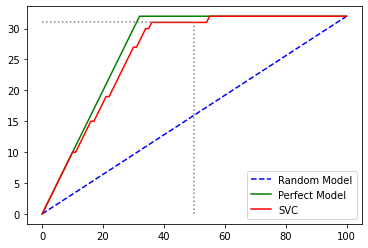

In [46]:
plt.plot([0,len(y_test)],[0,max_ones],color='blue',linestyle='dashed',label='Random Model')
plt.plot([0,max_ones,len(x_test)],[0,max_ones,max_ones],color='green',linestyle='solid',label='Perfect Model')
plt.plot(x_scale,y_scale,color='red',linestyle='solid',label='SVC')
plt.plot([mid,mid],[0,y_scale[mid]],color='grey',linestyle='dotted')
plt.plot([0,mid],[y_scale[mid],y_scale[mid]],color='grey',linestyle='dotted')
plt.legend()

In [47]:
print(100*y_scale[mid]/max_ones)

96.875
